In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
import torch.nn.functional as F

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg

In [2]:
%run KZTIHT_Functions.ipynb
%run "Adaptive Row Removal Functions.ipynb"
%run Optimising_Trimming.ipynb

In [3]:
np.random.seed(9)

In [4]:
n_dim = [20,20,20]
m = 4250

A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
AA = A_4.T
itr = 15

r = [2,2,2]
X = random_low_rank_HOSVD(n_dim,r)
x = vectorize_np(X)

yy = AA@x
n = np.shape(X)

In [5]:
delta_1_l, delta_2_l, rho_1_l, rho_2_l, rate_1_l, rate_2_l, error, error_clip = adaptive_TIHT_comp(AA,yy,X,r,lamda = 1/m,mu = 1,itr=itr,num_high=13)

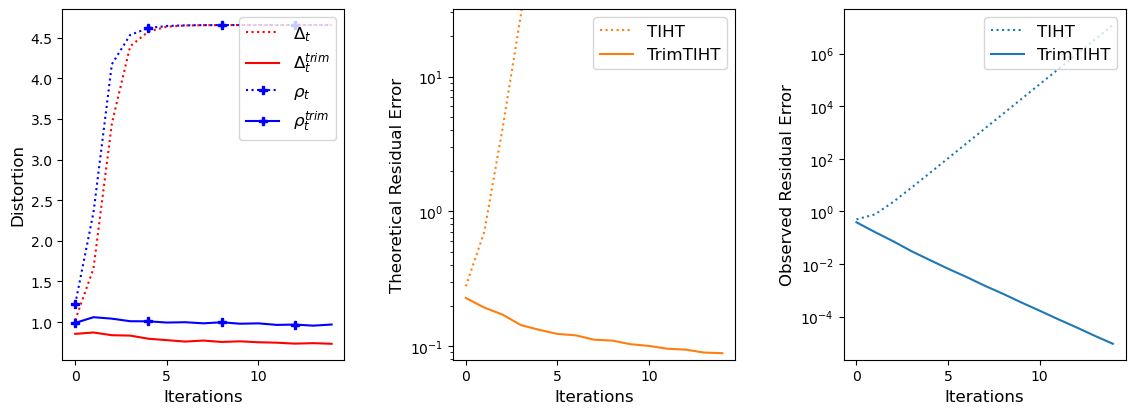

In [6]:
fig, axs = plt.subplots(1, 3)
fig.tight_layout()
fig.set_size_inches(12, 4)

axs[0].plot(range(itr), delta_1_l,  label= r"$\Delta_t$", color = 'red',linestyle = ':')
axs[0].plot(range(itr), delta_2_l,  label= r"$\Delta_t^{trim}$", color = 'red')
axs[0].plot(range(itr), rho_1_l,  label= r"$\rho_t$", color = 'blue',linestyle = ':',marker = 'P',markevery = 4)
axs[0].plot(range(itr), rho_2_l,  label= r"$\rho_t^{trim}$", color = 'blue',marker = 'P',markevery = 4)
axs[0].legend(loc="upper right",fontsize = '12')
axs[0].set(xlabel="Iterations",ylabel="Distortion")
axs[0].xaxis.label.set(fontsize=12)
axs[0].yaxis.label.set(fontsize=12)
           
axs[1].plot(range(itr), rate_1_l,  label= "TIHT", color = 'C1', linestyle = ':')
axs[1].plot(range(itr), rate_2_l,  label= "TrimTIHT", color = 'C1')
axs[1].legend(loc="upper right",fontsize = '12')
axs[1].set_yscale("log")
axs[1].set(xlabel="Iterations",ylabel="Theoretical Residual Error")
axs[1].xaxis.label.set(fontsize=12)
axs[1].yaxis.label.set(fontsize=12)
axs[1].set_ylim([10**(-1.1), 10**(1.5)]) 

axs[2].plot(range(itr), error,  label= "TIHT", color = 'C0', linestyle = ':')
axs[2].plot(range(itr), error_clip,  label= "TrimTIHT", color = 'C0')
axs[2].set_yscale("log")
axs[2].legend(loc="upper right", fontsize = '12')
axs[2].set(xlabel="Iterations",ylabel="Observed Residual Error")
axs[2].xaxis.label.set(fontsize=12)
axs[2].yaxis.label.set(fontsize=12)

fig.savefig('rho_delta_plots.png')